In [48]:
import numpy as np 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import matplotlib

In [49]:
numeric = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins = sns.load_dataset('penguins').dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [50]:
le = preprocessing.LabelEncoder()
species_encoded = le.fit_transform(penguins['species'])
island_encoded = le.fit_transform(penguins['island'])
sex_encoded = le.fit_transform(penguins['sex'])

In [51]:
X = np.array(list(zip(species_encoded,island_encoded,penguins['bill_length_mm'],
                      penguins['bill_depth_mm'],penguins['flipper_length_mm'],penguins['body_mass_g'])))

In [52]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = .2)
X = sel.fit_transform(X)

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [56]:
X

array([[-4.57326291e+02,  1.33736876e+01],
       [-4.07253446e+02,  9.21104244e+00],
       [-9.57045660e+02, -8.12626780e+00],
       [-7.57116880e+02, -1.83070061e+00],
       [-5.57178474e+02,  3.42590387e+00],
       [-5.82310479e+02,  1.13911468e+01],
       [ 4.67770547e+02,  1.47986875e+01],
       [-1.00723330e+03,  3.03834638e+00],
       [-4.07185463e+02,  5.12164540e+00],
       [ 1.92830248e+02,  9.24464702e+00],
       [-5.07268252e+02,  9.53979894e+00],
       [-7.57078138e+02, -4.37923313e+00],
       [ 2.92834681e+02,  9.20199560e+00],
       [-8.82246225e+02,  5.33303553e+00],
       [-7.16043820e+00,  6.25589957e+00],
       [-8.07392795e+02,  1.48092530e+01],
       [-6.07327408e+02,  1.23744586e+01],
       [-4.07223358e+02,  7.66634525e+00],
       [-2.57292348e+02,  1.29638868e+01],
       [-4.07346191e+02,  1.50407553e+01],
       [-4.07255803e+02,  9.71526403e+00],
       [-6.57263871e+02,  7.82699766e+00],
       [-1.00715908e+03, -1.47907635e+00],
       [-1.

In [54]:
y = sex_encoded

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

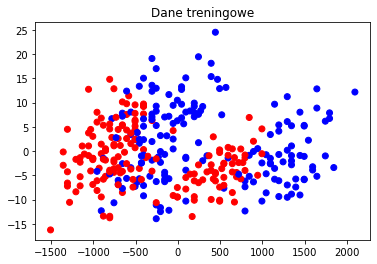

In [57]:
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF']) 
matplotlib.pyplot.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold)
matplotlib.pyplot.title('Dane treningowe')
matplotlib.pyplot.show()

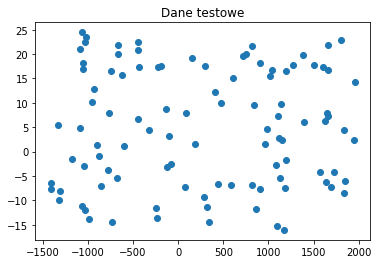

In [58]:
import random

clf = neighbors.KNeighborsClassifier(3, weights='uniform')
clf.fit(X_train, y_train)
N = 100
xx = [random.uniform(X[:, 0].min(), X[:, 0].max()) for i in range(N)]
yy = [random.uniform(X[:, 1].min(), X[:, 1].max()) for i in range(N)]
matplotlib.pyplot.scatter(xx, yy)
matplotlib.pyplot.title('Dane testowe')
matplotlib.pyplot.show()

In [59]:
points = np.column_stack((xx, yy))

In [60]:
Z = clf.predict(points)

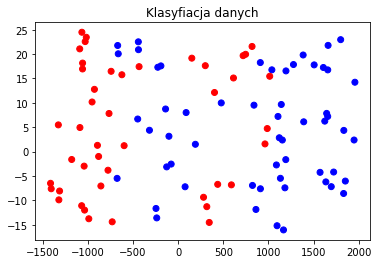

In [61]:
matplotlib.pyplot.scatter(points[:, 0], points[:, 1], c=Z, cmap=cmap_bold)
matplotlib.pyplot.title('Klasyfiacja danych')
matplotlib.pyplot.show()

In [62]:
Z

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [63]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [64]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred, average = 'micro'))

Accuracy: 0.7313432835820896
F1-score: 0.7313432835820896


In [65]:
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("Wartości dla n_neighbors = " + str(i))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'micro'))

Wartości dla n_neighbors = 1
Accuracy: 0.6791044776119403
F1-score: 0.6791044776119403
Wartości dla n_neighbors = 2
Accuracy: 0.7164179104477612
F1-score: 0.7164179104477613
Wartości dla n_neighbors = 3
Accuracy: 0.7313432835820896
F1-score: 0.7313432835820896
Wartości dla n_neighbors = 4
Accuracy: 0.7313432835820896
F1-score: 0.7313432835820896
Wartości dla n_neighbors = 5
Accuracy: 0.753731343283582
F1-score: 0.753731343283582
Wartości dla n_neighbors = 6
Accuracy: 0.7388059701492538
F1-score: 0.7388059701492538
Wartości dla n_neighbors = 7
Accuracy: 0.7238805970149254
F1-score: 0.7238805970149254
Wartości dla n_neighbors = 8
Accuracy: 0.7761194029850746
F1-score: 0.7761194029850746
Wartości dla n_neighbors = 9
Accuracy: 0.7985074626865671
F1-score: 0.7985074626865672
Wartości dla n_neighbors = 10
Accuracy: 0.7686567164179104
F1-score: 0.7686567164179104
Wartości dla n_neighbors = 11
Accuracy: 0.7985074626865671
F1-score: 0.7985074626865672
Wartości dla n_neighbors = 12
Accuracy: 0.8

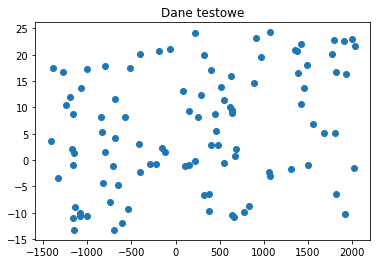

In [75]:
import random

clf = neighbors.KNeighborsClassifier(12, weights='uniform')
clf.fit(X_train, y_train)
N = 100
xx1 = [random.uniform(X[:, 0].min(), X[:, 0].max()) for i in range(N)]
yy1 = [random.uniform(X[:, 1].min(), X[:, 1].max()) for i in range(N)]
matplotlib.pyplot.scatter(xx, yy)
matplotlib.pyplot.title('Dane testowe')
matplotlib.pyplot.show()

In [76]:
points0 = np.column_stack((xx1, yy1))

In [77]:
Z2 = clf.predict(points0)

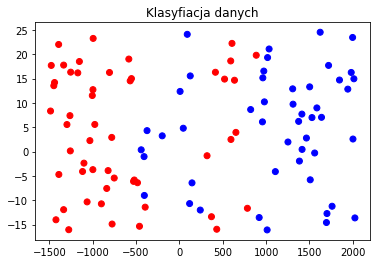

In [78]:
matplotlib.pyplot.scatter(points0[:, 0], points0[:, 1], c=Z2, cmap=cmap_bold)
matplotlib.pyplot.title('Klasyfiacja danych')
matplotlib.pyplot.show()

In [79]:
Z2

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [83]:
suma = 0
for i in range(len(Z)):
    if Z[i]==Z2[i]: suma = suma + 1
suma, len(Z)

(57, 100)

In [97]:
l = le.fit_transform(penguins['species'])
K = np.array(list(zip(island_encoded,sex_encoded,penguins['bill_length_mm'],
                      penguins['bill_depth_mm'],penguins['flipper_length_mm'],penguins['body_mass_g'])))

In [85]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = .2)
K = sel.fit_transform(K)

In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
K = pca.fit_transform(K)

In [87]:
K

array([[-4.57325539e+02,  1.33732119e+01],
       [-4.07252943e+02,  9.18655137e+00],
       [-9.57045327e+02, -8.15155935e+00],
       [-7.57116485e+02, -1.85993142e+00],
       [-5.57177753e+02,  3.41232768e+00],
       [-5.82310030e+02,  1.13794320e+01],
       [ 4.67771585e+02,  1.47498771e+01],
       [-1.00723298e+03,  3.03721973e+00],
       [-4.07184695e+02,  5.10195194e+00],
       [ 1.92831200e+02,  9.19512665e+00],
       [-5.07267780e+02,  9.51801506e+00],
       [-7.57077743e+02, -4.41078010e+00],
       [ 2.92835664e+02,  9.15588441e+00],
       [-8.82245869e+02,  5.32147706e+00],
       [-7.15954753e+00,  6.22451134e+00],
       [-8.07392416e+02,  1.48148929e+01],
       [-6.07326703e+02,  1.23789877e+01],
       [-4.07222856e+02,  7.63456542e+00],
       [-2.57291535e+02,  1.29510532e+01],
       [-4.07345424e+02,  1.50409188e+01],
       [-4.07255300e+02,  9.68665644e+00],
       [-6.57263181e+02,  7.82924209e+00],
       [-1.00715876e+03, -1.48905924e+00],
       [-1.

In [88]:
K_train, K_test, l_train, l_test = train_test_split(K, l, test_size=0.4)

In [90]:
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(K_train, l_train)
    l_pred = knn.predict(K_test)
    print("Wartości dla n_neighbors = " + str(i))
    print("Accuracy:",metrics.accuracy_score(l_test, l_pred))
    print("F1-score:",metrics.f1_score(l_test, l_pred, average = 'micro'))

Wartości dla n_neighbors = 1
Accuracy: 0.7910447761194029
F1-score: 0.7910447761194029
Wartości dla n_neighbors = 2
Accuracy: 0.7985074626865671
F1-score: 0.7985074626865672
Wartości dla n_neighbors = 3
Accuracy: 0.7611940298507462
F1-score: 0.7611940298507462
Wartości dla n_neighbors = 4
Accuracy: 0.8208955223880597
F1-score: 0.8208955223880597
Wartości dla n_neighbors = 5
Accuracy: 0.8208955223880597
F1-score: 0.8208955223880597
Wartości dla n_neighbors = 6
Accuracy: 0.7985074626865671
F1-score: 0.7985074626865672
Wartości dla n_neighbors = 7
Accuracy: 0.8059701492537313
F1-score: 0.8059701492537313
Wartości dla n_neighbors = 8
Accuracy: 0.835820895522388
F1-score: 0.835820895522388
Wartości dla n_neighbors = 9
Accuracy: 0.7388059701492538
F1-score: 0.7388059701492538
Wartości dla n_neighbors = 10
Accuracy: 0.753731343283582
F1-score: 0.753731343283582
Wartości dla n_neighbors = 11
Accuracy: 0.746268656716418
F1-score: 0.746268656716418
Wartości dla n_neighbors = 12
Accuracy: 0.79850

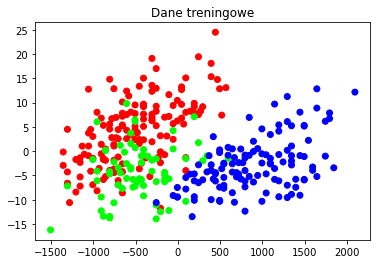

In [91]:
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF']) 
matplotlib.pyplot.scatter(K[:, 0], K[:, 1], c = l, cmap = cmap_bold)
matplotlib.pyplot.title('Dane treningowe')
matplotlib.pyplot.show()

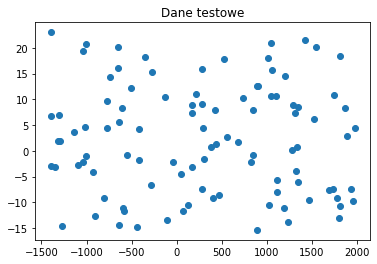

In [92]:
import random

clf = neighbors.KNeighborsClassifier(8, weights='uniform')
clf.fit(K, l)
N = 100
xx = [random.uniform(K[:, 0].min(), K[:, 0].max()) for i in range(N)]
yy = [random.uniform(K[:, 1].min(), K[:, 1].max()) for i in range(N)]
matplotlib.pyplot.scatter(xx,yy)
matplotlib.pyplot.title('Dane testowe')
matplotlib.pyplot.show()

In [93]:
points2 = np.column_stack((xx, yy))

In [94]:
M = clf.predict(points2)

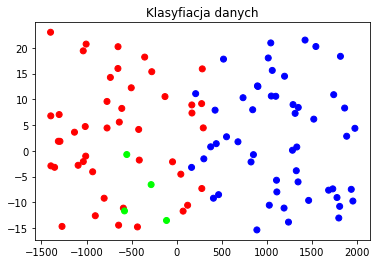

In [95]:
matplotlib.pyplot.scatter(points2[:, 0], points2[:, 1], c=M, cmap=cmap_bold)
matplotlib.pyplot.title('Klasyfiacja danych')
matplotlib.pyplot.show()

In [96]:
M

array([2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1])